# Question 3

 The data-set contains 21785 pictures of $69\times 69$ RBG pictures of galaxies. The galaxies are hand-labeled into the following 10 classes:


Class 0 : Disk, Face-on, No Spiral : 3461 images \\
Class 1 : Elliptical, Completely round : 6997 images \\
Class 2 : Elliptical, in-between round : 6292 images \\
Class 3 : Elliptical, Cigar shaped : 349 images \\
Class 4 : Disk, Edge-on, Rounded Bulge : 1534 images \\
Class 5 : Disk, Edge-on, Boxy Bulge : 17 images \\
Class 6 : Disk, Edge-on, No Bulge : 589 images \\
Class 7 : Disk, Face-on, Tight Spiral : 1121 images \\
Class 8 : Disk, Face-on, Medium Spiral : 906 images \\
Class 9 : Disk, Face-on, Loose Spiral : 519 images \\


Implement the following:
1.   Randomly select 10 images from the data-set and display them along with their labels. Display the number of galaxies in each category in the data. Display the shape of the image data. [5]
2.   Split the data into a $80:20$ training and testing set and prepare it to be fed into a Convolution Neural Network(CNN) of the structure described below. Print the shape of the training and testing data. [5]
3.   Construct a Convolution Neural Network(CNN) with three convolutional and four dense layers. Report which activation functions you have chosen for each layer and why. Print a summary of the model used. [10]
4.   Train the model on the training data. Report which optimizer you have used along with the learning rate and the loss used. Provide justification for your choices. [10]
5.   Report the training, validation and testing accuracies of your model. What conclusions can you draw from the training-validation accuracy plot? Can you identify any problems with the model from the plot? If so, how do you suggest to improve the model? [10]
6.   Create two new models, one with an extra convolution layer and one with an extra dense layer. Report the model summaries. Draw comparisons between the change in the number of trainable parameters in both cases and explain the observed difference due to the introduction of the new layers. [10]


Submit the code and the plots and the answers to the questions in a detailed and well documented .ipynb notebook. Once you save your jupyter notebook make sure all the outputs are seen when it is reopened (without the need for compiling it again).

Do not change the cells marked DO NOT EDIT. 
Add text cells to answer each of the theory questions.



In [1]:
# DO NOT EDIT
# Fetching the data-set and saving to current directory. Run this cell only once on runtime start-up.
# !wget http://astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5

In [2]:
# DO NOT EDIT
# Defining a list that maps image labels in Galaxy10.h5 to their meanings.

galaxy_labels = ['Disk, Face-on, No Spiral', 'Elliptical, Completely round', 'Elliptical, in-between round', 'Elliptical, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 'Disk, Edge-on, No Bulge', 'Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

In [3]:
# Cell for Imports --> Put all your imports here.
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

2022-11-28 12:35:54.855680: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# DO NOT EDIT
# Reading the Galaxy.h5 file 
with h5py.File('Galaxy10.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

labels = utils.to_categorical(labels, 10)
labels = labels.astype(np.float32)
images = images.astype(np.float32)

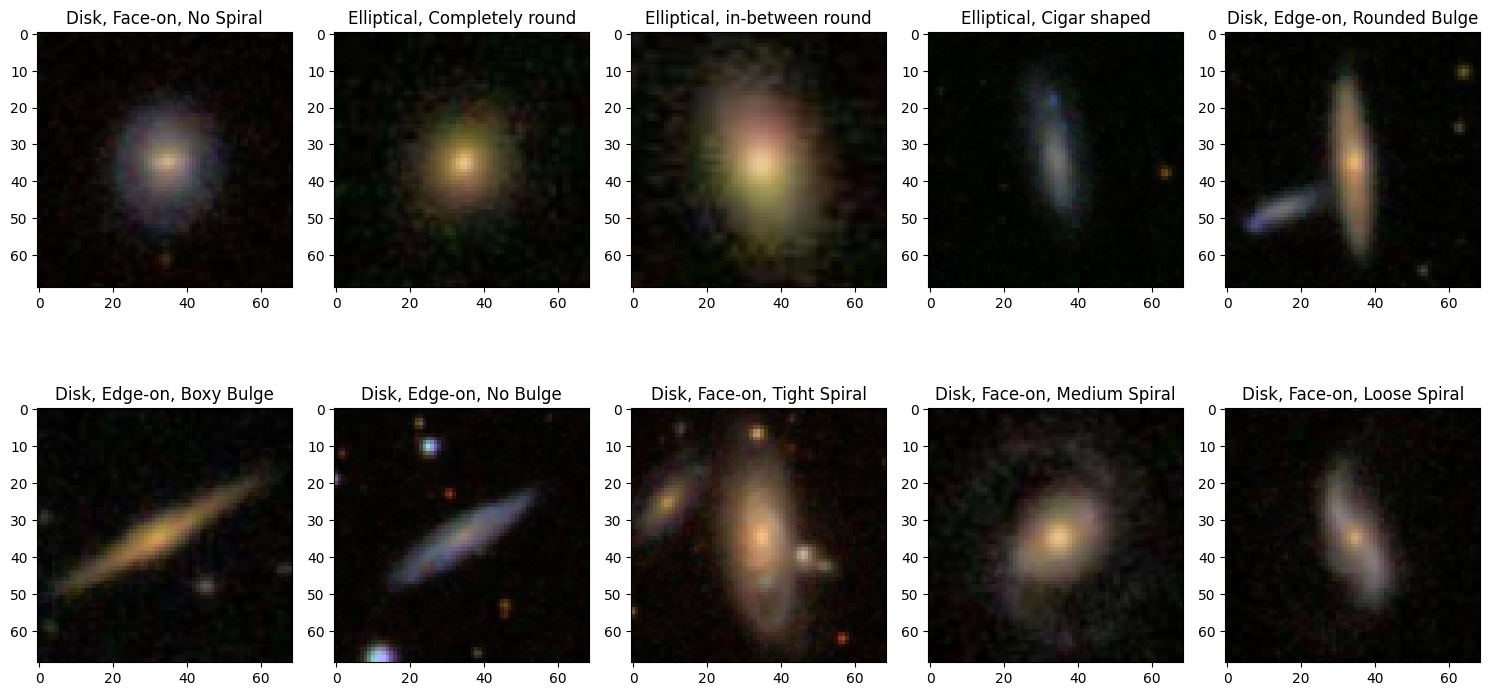

In [5]:
# Cell to display 10 random images from the loaded data along with their respective labels
from random import randint
from matplotlib import pyplot as plt

def findFirst(a, p):
    for i in range(len(a)):
        if (p(a[i])):
            return i
    return -1

fig, ax = plt.subplots(2, 5, figsize=(15, 8))
for i in range(10):
    index = findFirst(labels, lambda x: x[i])
    ax[i // 5][i % 5].imshow(images[index].astype(np.uint8))
    ax[i // 5][i % 5].set_title(galaxy_labels[i])
    
fig.tight_layout()

In [6]:
# Cell to print the print the number of galaxies in each category in the data.

galaxy_label_counts = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(labels)):
  galaxy_label_counts[np.argmax(labels[i])] += 1

for i in range(len(galaxy_label_counts)):
  print(f'{galaxy_labels[i]} : {galaxy_label_counts[i]}')

Disk, Face-on, No Spiral : 3461
Elliptical, Completely round : 6997
Elliptical, in-between round : 6292
Elliptical, Cigar shaped : 349
Disk, Edge-on, Rounded Bulge : 1534
Disk, Edge-on, Boxy Bulge : 17
Disk, Edge-on, No Bulge : 589
Disk, Face-on, Tight Spiral : 1121
Disk, Face-on, Medium Spiral : 906
Disk, Face-on, Loose Spiral : 519


In [7]:
# Cell to print the shape of each image

print(np.shape(images[0]))

(69, 69, 3)


In [8]:
# Cell to prepare the data for training and split the data into training and testing sets in a 80:20 ratio

train_tensors, test_tensors, train_labels, test_labels = train_test_split(images, labels, test_size=0.20)
val_tensors = train_tensors[-2000:]
val_labels = train_labels[-2000:]

In [9]:
# Cell to print the shape of the training and testing data

print('------------------ Tensor Dimensions ------------------------\n' )
print ("Train Tensors Size : ")
print (np.shape(train_tensors))
print ("Test Tensors Size : ")
print (np.shape(test_tensors))
print ('--------------------------------')
print ("Train Labels Size : ")
print (np.shape(train_labels))
print ("Test Labels Size : ")
print (np.shape(test_labels))

------------------ Tensor Dimensions ------------------------

Train Tensors Size : 
(17428, 69, 69, 3)
Test Tensors Size : 
(4357, 69, 69, 3)
--------------------------------
Train Labels Size : 
(17428, 10)
Test Labels Size : 
(4357, 10)


In [10]:
# Cell to build the CNN model and print the model summary

# class FirstModel(tf.keras.Model):
#     def __init__(self):
#         super().__init__()
#         self.flatten = tf.keras.layers.Flatten()
#         self.dense1 = tf.keras.layers.Dense(69, activation=tf.nn.elu)
#         self.dense2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
#
#     def call(self, inputs):
#         l1 = self.flatten(inputs)
#         l2 = self.dense1(l1)
#         l3 = self.dense2(l2)
#         return l3
# model = FirstModel()


# I am using ReLU for all the layers other than the output layer to keep the model linear and fast
# and Softmax for the last layer for classification with 10 nodes as we have 10 classes of the data.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),

    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# I am using the default learning rate i.e., learning_rate=1e-3
# I am using Adam optimizer as it considers both adaptive learning rate 
# and momentum and is also one the best optimizers empirically
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model.build(train_tensors.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (17428, 67, 67, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (17428, 33, 33, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (17428, 31, 31, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (17428, 15, 15, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (17428, 13, 13, 32)       9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (17428, 6, 6, 32)        0

Epoch 1/10
545/545 [==============================] - 8s 14ms/step - loss: 0.2025 - accuracy: 0.5201 - val_loss: 0.1466 - val_accuracy: 0.6650
Epoch 2/10
545/545 [==============================] - 7s 13ms/step - loss: 0.1418 - accuracy: 0.6853 - val_loss: 0.1468 - val_accuracy: 0.6690
Epoch 3/10
545/545 [==============================] - 7s 14ms/step - loss: 0.1257 - accuracy: 0.7257 - val_loss: 0.1331 - val_accuracy: 0.6970
Epoch 4/10
545/545 [==============================] - 7s 14ms/step - loss: 0.1156 - accuracy: 0.7524 - val_loss: 0.1003 - val_accuracy: 0.7975
Epoch 5/10
545/545 [==============================] - 7s 14ms/step - loss: 0.1077 - accuracy: 0.7707 - val_loss: 0.0942 - val_accuracy: 0.7985
Epoch 6/10
545/545 [==============================] - 7s 13ms/step - loss: 0.0990 - accuracy: 0.7932 - val_loss: 0.0901 - val_accuracy: 0.8155
Epoch 7/10
545/545 [==============================] - 7s 14ms/step - loss: 0.0890 - accuracy: 0.8140 - val_loss: 0.0774 - val_accuracy: 0.8375

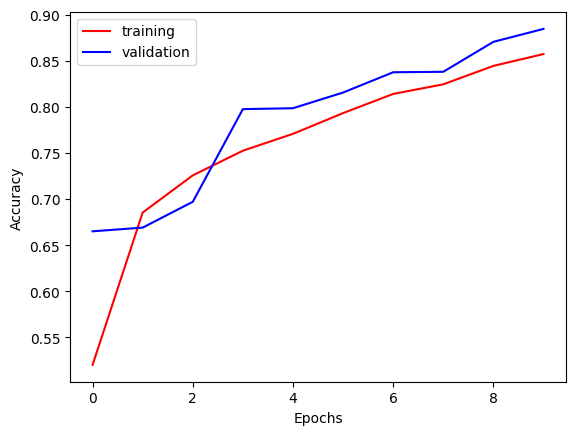

Training Accuracy:  0.8572412133216858
Validation Accuracy:  0.8845000267028809
Test Accuracy:  0.7626807689666748


In [11]:
# Cell to train the CNN model created above and plot the accuracy

history = model.fit(train_tensors, train_labels, epochs=10, validation_data=(val_tensors, val_labels))
results = model.evaluate(test_tensors, test_labels)
plt.plot(history.epoch, history.history["accuracy"], color="r", label="training")
plt.plot(history.epoch, history.history["val_accuracy"], color="b", label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# From the plot of training accuracy vs validation accuracy we can see that validation accuracy increases 
# with increase in training accuracy on an average. 
# Hence our model is a good model

print("Training Accuracy: ", history.history["accuracy"][-1])
print("Validation Accuracy: ", history.history["val_accuracy"][-1])
print("Test Accuracy: ", results[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (17428, 67, 67, 32)       896       
                                                                 
 max_pooling2d_3 (MaxPooling  (17428, 33, 33, 32)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (17428, 31, 31, 32)       9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (17428, 15, 15, 32)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (17428, 13, 13, 32)       9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (17428, 6, 6, 32)       

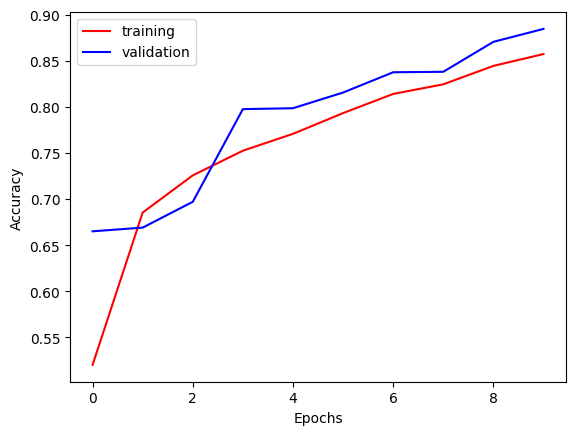

Training Accuracy:  0.8572412133216858
Validation Accuracy:  0.8845000267028809
Test Accuracy:  0.7296304702758789


In [12]:
# Cell to build a model with four convolutional layers and four dense layers

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)
model1.build(train_tensors.shape)
model1.summary()

history1 = model1.fit(train_tensors, train_labels, epochs=10, validation_data=(val_tensors, val_labels))
results1 = model1.evaluate(test_tensors, test_labels)
plt.plot(history.epoch, history.history["accuracy"], color="r", label="training")
plt.plot(history.epoch, history.history["val_accuracy"], color="b", label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("Training Accuracy: ", history.history["accuracy"][-1])
print("Validation Accuracy: ", history.history["val_accuracy"][-1])
print("Test Accuracy: ", results1[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (17428, 67, 67, 32)       896       
                                                                 
 max_pooling2d_7 (MaxPooling  (17428, 33, 33, 32)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (17428, 31, 31, 32)       9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (17428, 15, 15, 32)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (17428, 13, 13, 32)       9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (17428, 6, 6, 32)       

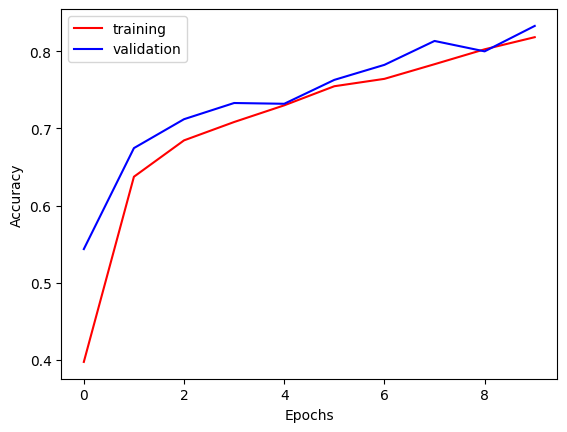

Training Accuracy:  0.8183956742286682
Validation Accuracy:  0.8330000042915344
Test Accuracy:  0.7599265575408936


In [13]:
# Cell to build a model with three convolutional layers and five dense layers

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)
model2.build(train_tensors.shape)
model2.summary()

history = model2.fit(train_tensors, train_labels, epochs=10, validation_data=(val_tensors, val_labels))
results2 = model2.evaluate(test_tensors, test_labels)
plt.plot(history.epoch, history.history["accuracy"], color="r", label="training")
plt.plot(history.epoch, history.history["val_accuracy"], color="b", label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("Training Accuracy: ", history.history["accuracy"][-1])
print("Validation Accuracy: ", history.history["val_accuracy"][-1])
print("Test Accuracy: ", results2[1])

Model with 3 convolution layers and 4 dense layers:  1479562
Model with 4 convolution layers and 4 dense layers:  79322
Model with 3 convolution layers and 5 dense layers:  1480122


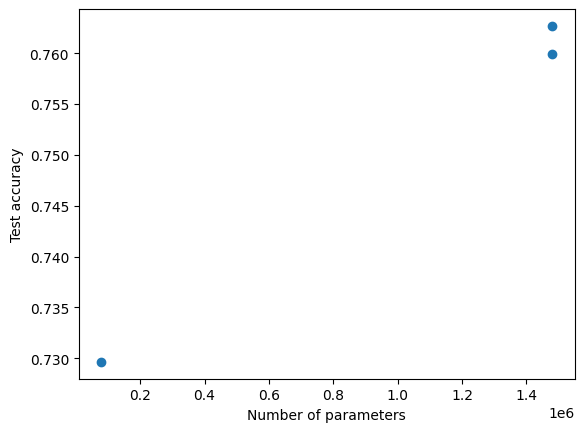

In [17]:
# We can see that adding a convolution layer doesn't change the training accuracy but decreases the test accuracy slightly i.e., the generalization decreases slightly
# and since the difference is not much, we can say that 3 convolution layers are sufficient to capture the adjacent relations in the data

# We can see that adding a dense layer decreases the training accuracy but increases the test accuracy i.e., the generalization increases
# from this we can say that 4 dense layers underfits the data

print("Model with 3 convolution layers and 4 dense layers: ", model.count_params())
print("Model with 4 convolution layers and 4 dense layers: ", model1.count_params())
print("Model with 3 convolution layers and 5 dense layers: ", model2.count_params())

# From the plot of number of parameters vs test accuracy, we can say that accuracy 
# increases with the increase in number of parameters (i.e., our models are not a overfit for the data)
plt.scatter([model.count_params(), model1.count_params(), model2.count_params()], [results[1], results1[1], results2[1]])
plt.xlabel("Number of parameters")
plt.ylabel("Test accuracy")
plt.show()